In [149]:
# Final Project: Credit Card Fraud Models
# Group Members: Cole, Jared, Mansuur

In [150]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

import random

In [151]:
# Create a function to open input file
# Return list of instances
def get_inst_from_file(filename):
    all_instances = []
    fin = open(filename,"r")
    fin.readline()

    for line in fin:
        all_instances.append(line.strip().split(","))
    
    fin.close()
    
    #Check for nulls, returned nothing
    for instance in all_instances:
        for i in range(7):
            if instance[i] is None:
                print("Instance with none")
                
    return all_instances


In [152]:
# Print first 10 instances
cf_instances = get_inst_from_file("card_transdata.csv")
print(cf_instances[:16])

[['57.87785658389723', '0.3111400080477545', '1.9459399775518593', '1.0', '1.0', '0.0', '0.0', '0.0'], ['10.829942699255545', '0.17559150228166587', '1.2942188106198573', '1.0', '0.0', '0.0', '0.0', '0.0'], ['5.091079490616996', '0.8051525945853258', '0.42771456119427587', '1.0', '0.0', '0.0', '1.0', '0.0'], ['2.2475643282963613', '5.60004354707232', '0.36266257805709584', '1.0', '1.0', '0.0', '1.0', '0.0'], ['44.19093600261837', '0.5664862680583477', '2.2227672978404707', '1.0', '1.0', '0.0', '1.0', '0.0'], ['5.586407674186407', '13.261073268058121', '0.06476846537046335', '1.0', '0.0', '0.0', '0.0', '0.0'], ['3.7240191247148107', '0.9568379284821842', '0.27846494490815554', '1.0', '0.0', '0.0', '1.0', '0.0'], ['4.8482465722805665', '0.3207354272228163', '1.2730495235601782', '1.0', '0.0', '1.0', '0.0', '0.0'], ['0.8766322564943629', '2.5036089266921437', '1.5169993152858177', '0.0', '0.0', '0.0', '0.0', '0.0'], ['8.83904670372637', '2.9705122760243827', '2.36168254706846', '1.0', '0.

In [153]:
# Printing out the number of fraud and not fraud instances respectively
not_fraud_instances = []
fraud_instances = []
for instance in cf_instances:
    if (instance[7] == '1.0'):
        curInstance = instance
        curInstance[7] = 1
        fraud_instances.append(curInstance)
    else:
        curInstance = instance
        curInstance[7] = 0
        not_fraud_instances.append(curInstance)
print(fraud_instances[:10])
print('')
print(not_fraud_instances[:10])

#Creates a smaller sample of non-fradulant purchases, randomly selected w/o overlapo
not_fraud_sample = random.sample(not_fraud_instances, len(fraud_instances))

#Joining the smaller fraud sample with the fraud_instances
allSample = fraud_instances + not_fraud_sample
X = []
y = []


#Creating X and y arrays, X w/o label and y with.
for instance in allSample:
    X.append(instance[:7])
    y.append(instance[7])
{}


[['2.131955665990563', '56.3724005365082', '6.358667321630612', '1.0', '0.0', '0.0', '1.0', 1], ['3.8030573513256023', '67.24108052618409', '1.8729496143044642', '1.0', '0.0', '0.0', '1.0', 1], ['15.694985541059943', '175.98918151972342', '0.8556228290724207', '1.0', '0.0', '0.0', '1.0', 1], ['26.711462023719893', '1.5520081259491354', '4.603600688206188', '1.0', '1.0', '0.0', '1.0', 1], ['10.664473716016785', '1.5657690862016613', '4.886520843107555', '1.0', '0.0', '0.0', '1.0', 1], ['2.530145018135443', '3.6897810904940105', '8.297406866219774', '1.0', '0.0', '0.0', '1.0', 1], ['21.12611616077098', '0.27198739643980063', '6.081770719263626', '1.0', '0.0', '0.0', '1.0', 1], ['151.37043724281128', '5.340080994904885', '1.171566647935164', '1.0', '0.0', '0.0', '1.0', 1], ['9.598401340573979', '0.4545563461632137', '6.084828700634962', '1.0', '0.0', '0.0', '1.0', 1], ['22.545587575167414', '0.35393925466184956', '4.0954422060767035', '1.0', '0.0', '0.0', '1.0', 1]]

[['57.87785658389723'

{}

In [154]:
# Create train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 , random_state=100)

Feature importance: 
[0.24656478 0.14583845 0.45199827 0.0011838  0.02640579 0.02043145
 0.10757745]
Accuracy score: 0.9835818618664429


[Text(0.45689655172413796, 0.9, 'x[2] <= 4.0\nentropy = 1.0\nsamples = 122364\nvalue = [61118, 61246]'),
 Text(0.1896551724137931, 0.7, 'x[0] <= 100.004\nentropy = 0.745\nsamples = 74275\nvalue = [58532, 15743]'),
 Text(0.3232758620689655, 0.8, 'True  '),
 Text(0.06896551724137931, 0.5, 'x[6] <= 0.5\nentropy = 0.321\nsamples = 60283\nvalue = [56759, 3524]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 19900\nvalue = [19900, 0]'),
 Text(0.10344827586206896, 0.3, 'x[1] <= 49.996\nentropy = 0.427\nsamples = 40383\nvalue = [36859, 3524]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.0\nsamples = 36653\nvalue = [36653, 0]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.308\nsamples = 3730\nvalue = [206, 3524]'),
 Text(0.3103448275862069, 0.5, 'x[6] <= 0.5\nentropy = 0.548\nsamples = 13992\nvalue = [1773, 12219]'),
 Text(0.2413793103448276, 0.3, 'x[1] <= 49.844\nentropy = 0.532\nsamples = 1124\nvalue = [988.0, 136.0]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.0\nsamples 

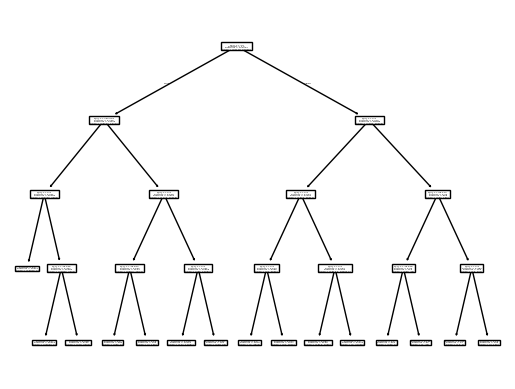

In [253]:
#Decision tree done with best splits and gini criteria
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4, max_features=4)

clf = classifier.fit(X_train, y_train)

clfy_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, clfy_pred)
print("Feature importance: ")
print(clf.feature_importances_)

print(f'Accuracy score: {accuracy}')
tree.plot_tree(clf)

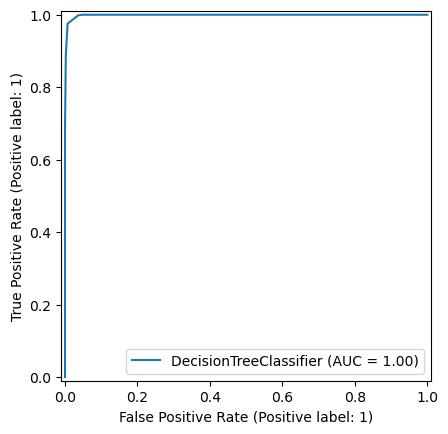

In [254]:
#ROC OF Decision Tree
RocCurveDisplay.from_estimator(clf, X, y)

In [186]:
##KFOLDs
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

cvResults = cross_val_score(classifier, X, y, cv=cv)

print(cvResults)
print(cvResults.mean())


[0.99173388 0.97173994 0.98200852 0.9575527  0.96038443]
0.9726838950036756


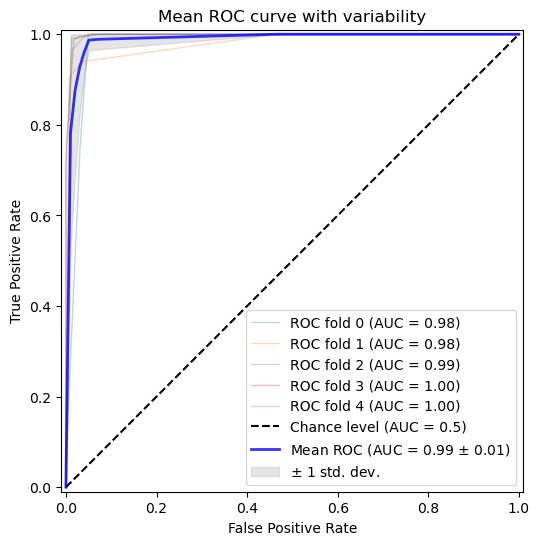

In [188]:
##Roc Curve KFOLDs

tprs = []
aucs = []
feature_importances = []
trees = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    feature_importances.append(classifier.feature_importances_)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.legend(loc="lower right")
plt.show()

[0.25291221 0.0724192  0.59338033 0.00976812 0.02571898 0.01220871
 0.03359246]


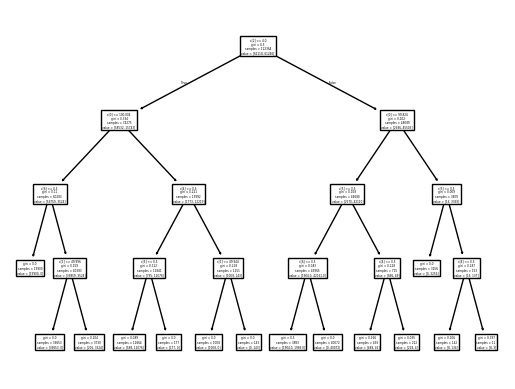

In [189]:
#Generates the image of the decision tree
tree.plot_tree(classifier)
print(np.mean(feature_importances, axis=0))

In [160]:
#Creating a Random Forest and getting the accuracy score
rf = RandomForestClassifier(max_depth=4, max_features=4)
rf.fit(X_train,y_train)
rfy_pred = rf.predict(X_test)

rfy_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {rf_accuracy}')

Accuracy: 0.9939361580412647


7
[0.22121883 0.07089663 0.58614204 0.0052558  0.01851861 0.01876099
 0.0792071 ]

1.0


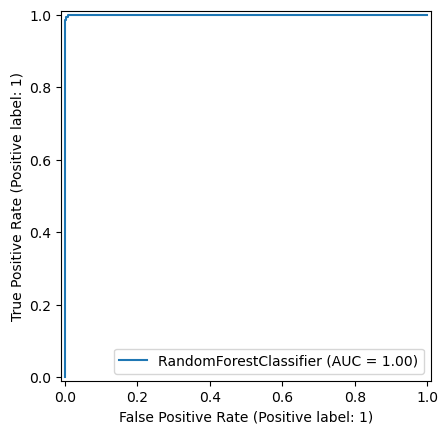

In [161]:
#Random Forest RoC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
print(rf.n_features_in_)
print(rf.feature_importances_)
print()
print(sum(rf.feature_importances_))


[Text(0.5089285714285714, 0.9, 'x[5] <= 0.5\ngini = 0.5\nsamples = 77532\nvalue = [61281.0, 61083.0]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 99.984\ngini = 0.499\nsamples = 73202\nvalue = [54613.0, 60896.0]'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[2] <= 4.0\ngini = 0.497\nsamples = 62464\nvalue = [53146.0, 45504.0]'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 0.5\ngini = 0.12\nsamples = 34639\nvalue = [51231, 3505]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 11347\nvalue = [17958, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.172\nsamples = 23292\nvalue = [33273, 3505]'),
 Text(0.21428571428571427, 0.3, 'x[6] <= 0.5\ngini = 0.083\nsamples = 27825\nvalue = [1915.0, 41999.0]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.5\nsamples = 2468\nvalue = [1915.0, 1952.0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 25357\nvalue = [0, 40047]'),
 Text(0.42857142857142855, 0.5, 'x[4] <= 0.5\ngini = 0.159\nsamples = 10738\nvalue = [1467, 15392]'

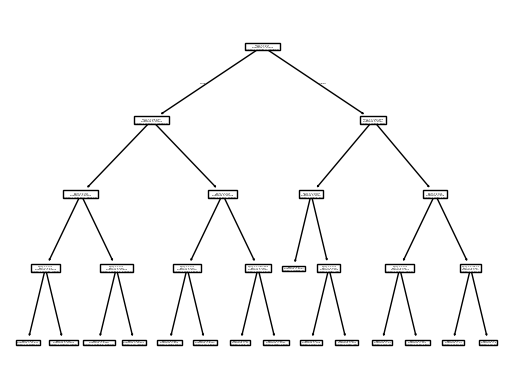

In [162]:
tree.plot_tree(rf[0])

[Text(0.44, 0.9, 'x[2] <= 4.0\ngini = 0.5\nsamples = 77366\nvalue = [60833, 61531]'),
 Text(0.2, 0.7, 'x[1] <= 50.0\ngini = 0.338\nsamples = 46938\nvalue = [58301, 15981]'),
 Text(0.32, 0.8, 'True  '),
 Text(0.08, 0.5, 'x[6] <= 0.5\ngini = 0.283\nsamples = 44050\nvalue = [57732, 11885]'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 12928\nvalue = [20496, 0]'),
 Text(0.12, 0.3, 'x[4] <= 0.5\ngini = 0.367\nsamples = 31122\nvalue = [37236, 11885]'),
 Text(0.08, 0.1, 'gini = 0.445\nsamples = 22532\nvalue = [23720.0, 11885.0]'),
 Text(0.16, 0.1, 'gini = 0.0\nsamples = 8590\nvalue = [13516, 0]'),
 Text(0.32, 0.5, 'x[5] <= 0.5\ngini = 0.214\nsamples = 2888\nvalue = [569.0, 4096.0]'),
 Text(0.28, 0.3, 'x[4] <= 0.5\ngini = 0.187\nsamples = 2832\nvalue = [479, 4096]'),
 Text(0.24, 0.1, 'gini = 0.106\nsamples = 2432\nvalue = [223, 3732]'),
 Text(0.32, 0.1, 'gini = 0.485\nsamples = 400\nvalue = [256.0, 364.0]'),
 Text(0.36, 0.3, 'gini = 0.0\nsamples = 56\nvalue = [90, 0]'),
 Text(0.68, 0.7, 'x[5] <= 0

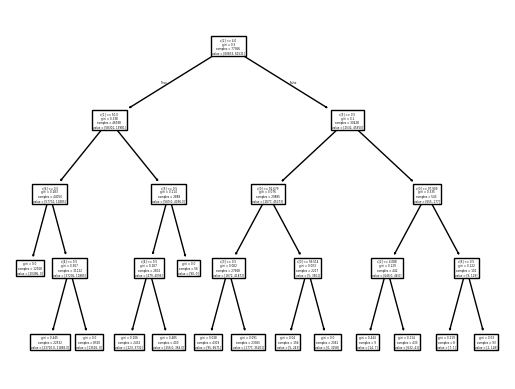

In [163]:
tree.plot_tree(rf[1])

[Text(0.5625, 0.9, 'x[5] <= 0.5\ngini = 0.5\nsamples = 77354\nvalue = [61206.0, 61158.0]'),
 Text(0.375, 0.7, 'x[2] <= 4.0\ngini = 0.498\nsamples = 73000\nvalue = [54541.0, 60964.0]'),
 Text(0.46875, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[0] <= 99.997\ngini = 0.354\nsamples = 43134\nvalue = [52672, 15744]'),
 Text(0.1, 0.3, 'x[4] <= 0.5\ngini = 0.12\nsamples = 34414\nvalue = [51176.0, 3489.0]'),
 Text(0.05, 0.1, 'gini = 0.164\nsamples = 22837\nvalue = [33003, 3262]'),
 Text(0.15, 0.1, 'gini = 0.024\nsamples = 11577\nvalue = [18173, 227]'),
 Text(0.3, 0.3, 'x[6] <= 0.5\ngini = 0.194\nsamples = 8720\nvalue = [1496, 12255]'),
 Text(0.25, 0.1, 'gini = 0.236\nsamples = 642\nvalue = [878, 139]'),
 Text(0.35, 0.1, 'gini = 0.092\nsamples = 8078\nvalue = [618, 12116]'),
 Text(0.55, 0.5, 'x[0] <= 99.824\ngini = 0.076\nsamples = 29866\nvalue = [1869, 45220]'),
 Text(0.5, 0.3, 'x[6] <= 0.5\ngini = 0.081\nsamples = 27833\nvalue = [1869.0, 42061.0]'),
 Text(0.45, 0.1, 'gini = 0.499\nsamples = 2478\nvalu

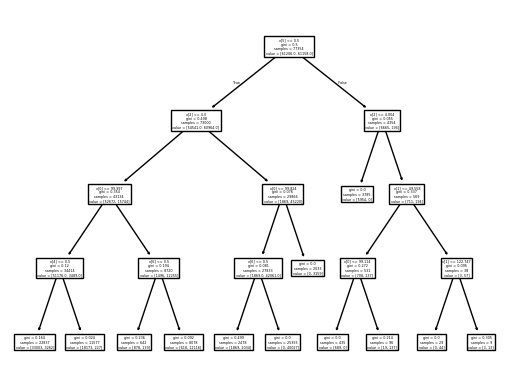

In [164]:
tree.plot_tree(rf[99])